<a href="https://colab.research.google.com/github/MatthewHawksbyGithub/pytorch-deep-learning/blob/main/01_Notebook_two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


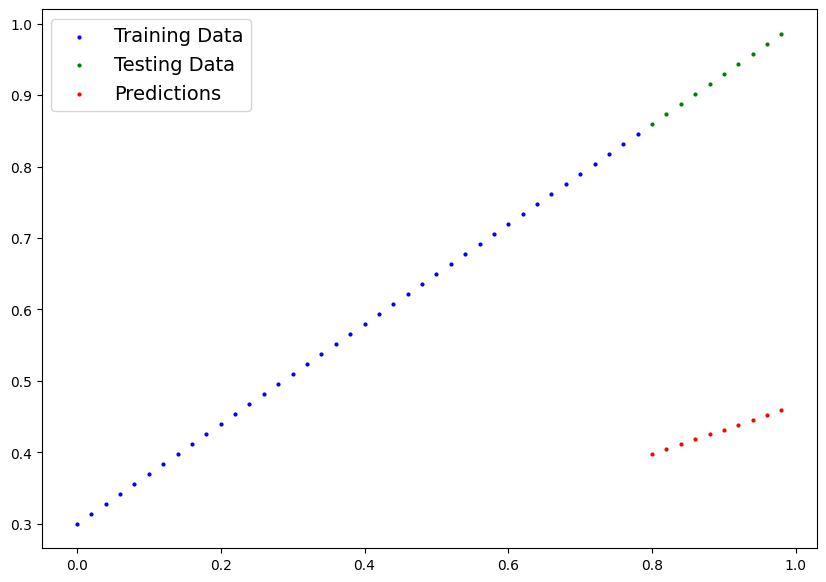

In [13]:
import torch
from torch import nn #nn contains all of PyTorch's neural networks components.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Acquire data.
#Convert into tensors.
#Build a model, or pick a pretrained model.
#Fit the model to the data and make a prediction.
#evaluate the model.
#Improving through experimentation.
#Save and reload your trained model.

#Exploring an example PyTorch end-to-end workflow.

#Let's recreate some known data using a linear regression formula.
#Making a straight line with known parameters. y = a +bx b
# is the weight and a is the bias.

weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

### Splitting data into training and test sets
#Generalization is the ability for a machine learning model to perform
#well on data that it hasn't seen before.

#Training set, validation set and testing set.
#Training is 60-80
#Validation is 10-20, test set is 10-20.

#80 20 is the most common split.

train_split = int(0.8 * len(X))
x_train, y_train = X[:train_split], y[:train_split]
x_test, y_test = X[train_split:], y[train_split:]

#scikit learn has a train test split that includes randomness.

len(x_train), len(y_train), len(x_test), len(y_test)

#Let's visualize the data with matplotlib:

def plot_predictions(train_data=x_train,train_labels=y_train,test_data=x_test,
                     test_labels=y_test,predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training Data")
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing Data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")
  plt.legend(prop={"size":14});

#plot_predictions()

#First PyTorch Model:
#Using a linear regression model.
#Create a linear regression model class.

class LinearRegressionModel (nn.Module):
  #<-- Almost everything inherits from nn.Module.
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True, #
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  def forward(self, x: torch.Tensor) -> torch.Tensor: #X is the input data.
      return self.weights * x + self.bias #The goal of this model is that
      #the model will start with random values for the weights and biases
      #and iteratively approach the known values for the weights and biases.
      #An algorithm called 'gradient descent'.

  #Two main algorithms: Gradient descent and backpropagation.

  #requires_Grad -> These algorithms are already implemented
  #torch.autograd

  #FORWARD DEFINES THE COMPUTATION MADE AT EVERY CALL!
  #IF YOU'RE GOING TO SUBCLASS nn.Module, you MUST HAVE
  #A FORWARD METHOD.

  ###PyTorch Model building essentials;

  #torch.nn - contains all the building blocks for computational graphs

  #torch.nn.Parameter - What parameters our model will try and learn.

  #torch.nn.Module - the base class for all neural network modules.

  #torch.optim - optimizers are here.
  #torchvision.models <=premade models for computer vision

  #torchmetrics
  #torch.utils.tensorboard

  #Create a random seed:
  torch.manual_seed(42)

  #Create an instance of the model.
model_0 = LinearRegressionModel()
print(model_0.state_dict())

#weights and bias are just random unaltered numbers right now.
#Predictive power is nil.

with torch.inference_mode():#Inference mode turns off gradient training.
  y_pred = model_0(x_test) #predictions are faster without inference mode.

#y_pred
#plot_predictions(predictions = y_pred)

## The whole idea of train is for a model to move some 'unknown' parameters
#(These may be random) to some 'known' parameters.

#Or from a poor-representation of the data, to a better representation of the data.

#How to measure how good or poor the representation is of the data?
#Use a loss function. "Minimizing the loss function"
#PyTorch has many loss functions built in.
#a loss function may also be called cost function or criterion.

#Mean absolute error.....
#Optimizer -> takes into account the loss of the model and adjusts the model's
#parameters(e.g. weights and biases)

#Setting up a loss function and optimizer in PyTorch

#for PyTorch we need a training loop and a testing loop.

#L1Loss
#SETTING UP A LOSS FUNCTION:

loss_fn = nn.L1Loss()

#Setup an optimizer i.e. SGD Stochastic Gradient Descent
#Tries random numbers repeatedly to minimize the loss function.

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.001)


#A hyperparameter is a value that you would set yourself.
#Learning rate here affects the 'step' of the optimizer; smaller learning rates
#give a smaller step rate. Parameter will change faster with a higher lr.

### Building a training loop in PyTorch

#A couple of things we need in a training loop:
#0. Loop through the data.
#1. Forward Pass, uses the Forward() function in the model. "forward propagation"
#2. Calculate the loss. (compare forward pass predictions to ground truth labels)
#3. Optimizer zero-grad
#4. Loss Backwards - move backwards through the network to calculate the gradients
#of the parameters of our model with respect to the loss (BACKPROPAGATION)
#5. Optimizer step - use the optimizer to adjust our model's parameters to
#try and improve the loss. (GRADIENT DESCENT)
#WHAT IS GRADIENT? GRADIENT IS A SLOPE.

#A epoch is one loop through the data.
epochs = 1

#0.
for epoch in range(epochs): #epochs are a hyperparameter.
  model_0.train() #Must set the model to training mode. The other is evaluation mode.
  model_0.eval() #turns off gradient tracking.








